# **My Data Science Project (Boston housing data)**

In [ ]:
pip install seaborn

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df = boston_df.loc[:,"CRIM":]

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## **Task 4: Generate discriptive statistics**

**Median Value using Boxplot**

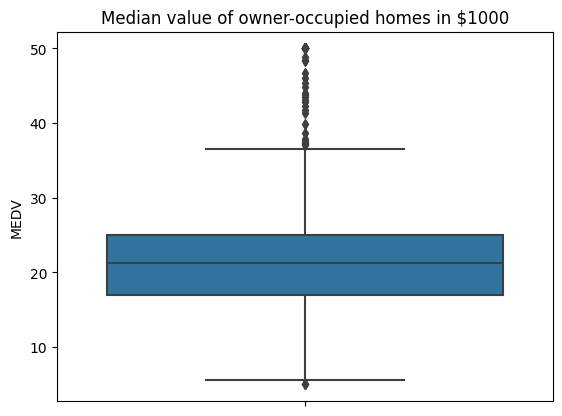

In [8]:
ax = sns.boxplot(y="MEDV", data=boston_df).set_title('Median value of owner-occupied homes in $1000')
plt.show()

*50% of houses value lies in between 25000 and 17000 Dollars.*

**Bar Plot of Charles river variable**

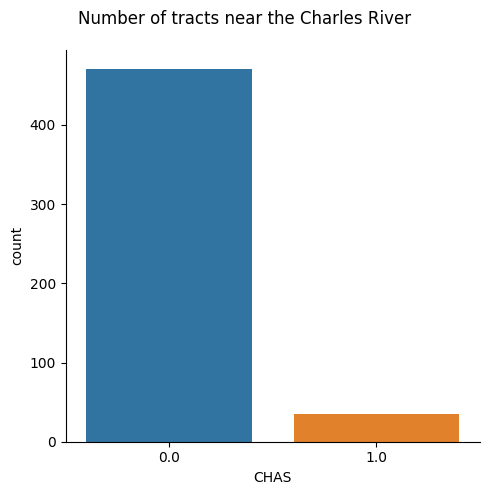

In [9]:
chas=sns.catplot(x='CHAS', kind='count', data=boston_df)
chas.fig.subplots_adjust(top=0.90)
chas.fig.suptitle('Number of tracts near the Charles River')
plt.show()

*About 460 tracts are not near the Charles river while only under 50 tracts are near the river.*

**Boxplot for MEDV vs AGE variable**

In [70]:
boston_df["age_group"] = boston_df["AGE"]
boston_df["age_group"] = pd.cut(x=boston_df["age_group"].astype(int), bins=[0,35,70,np.inf], labels=["35 and under","Between 35 and 70","70 and above"])

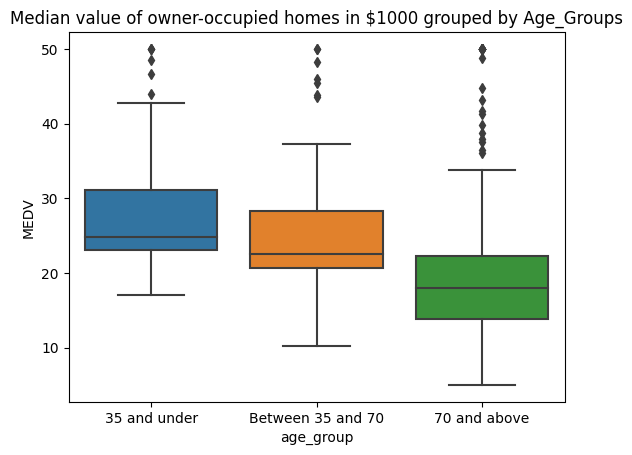

In [71]:
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df).set_title('Median value of owner-occupied homes in $1000 grouped by Age_Groups')
plt.show()

*We see a decline in Value with and increase in of the proportion of older housing units*

**Scatterplot between Nitric Oxide value and non-retail business proportion**

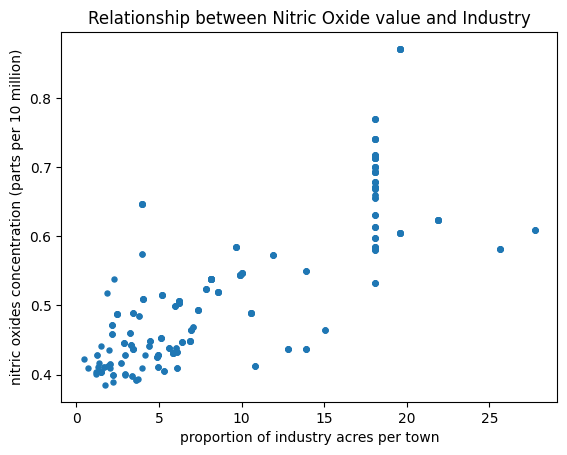

In [94]:
plt.scatter(x="INDUS", y="NOX", s=13, data=boston_df)
plt.title('Relationship between Nitric Oxide value and Industry')
plt.xlabel('proportion of industry acres per town')
plt.ylabel('nitric oxides concentration (parts per 10 million)')
plt.show()

*We can see a positive relationship between the two variables*

**Histogram for pupil to teacher ratio variable**

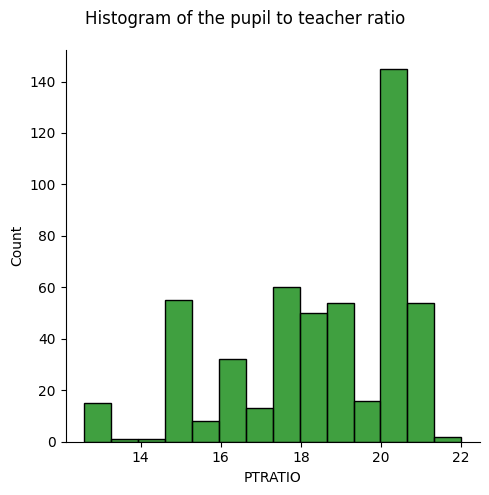

In [102]:
ptratio=sns.displot(boston_df["PTRATIO"], color='green', kde=False)
ptratio.fig.subplots_adjust(top=0.90)
ptratio.fig.suptitle('Histogram of the pupil to teacher ratio')
plt.show()

*We can see a spike at the ratio value of*&nbsp;21!

## **Task 5: Statistical tests to answer questions**

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median values between tracts near the river and not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in  median values between tracts near the river and not")

In [111]:
sample1 = boston_df["MEDV"].loc[boston_df["CHAS"] == 1]
sample2 = boston_df["MEDV"].loc[boston_df["CHAS"] == 0]
scipy.stats.ttest_ind(sample1, sample2 , equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

*My P-value is under 5% (my significance level) -> Reject null-hypothesis </br>
&emsp;&emsp;&emsp;-> There is a statistical difference in median value of houses near the river and not.* 

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

*   $H\_0: µ1 = µ2 = µ3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [119]:
sample1=boston_df["MEDV"].loc[boston_df["age_group"] == "35 and under"]
sample2=boston_df["MEDV"].loc[boston_df["age_group"] == "Between 35 and 70"]
sample3= boston_df["MEDV"].loc[boston_df["age_group"] == "70 and above"]

In [120]:
f_statistic, p_value = scipy.stats.f_oneway(sample1, sample2, sample3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 37.43617590931898, P-Value: 6.976238320409294e-16


*My P-value is near 0 and so less than 5%-significance level -> reject null-hypothesis </br>
&emsp;&emsp;&emsp;-> At least one mean of the groups is statistically different from the other means.*

**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

In [ ]:
*   $H\_0:$ Nitric Oxide concentration is not correlated with industry prop
*   $H\_1:$ Teaching evaluation score is correlated with beauty score

In [122]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061233745e-98)

*My P-value is near 0 and less than 5%-significance level -> reject null-hypothesis </br>
&emsp;&emsp;&emsp;-> There is a statistically significant relationship between nitric oxide concentration and the proportion of industry*

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [125]:
X = boston_df["DIS"]
y = boston_df["MEDV"]
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        17:50:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*From the coefficients table we see the "coef" for "DIS" is 1.0916 </br>
This means that for one more unit of weighted distance to the 5 employment centres the median values of houses increases by 1091.6 Dollars*